<a href="https://colab.research.google.com/github/mlvssyaswanth/colab-files/blob/main/np.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import zipfile, os

# Mount your Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 📁 Replace these paths with actual paths on your Google Drive
archive_zip = "/content/drive/MyDrive/archive.zip"
one_drive_zip = "/content/drive/MyDrive/OneDrive_2025-04-03.zip"

# 🔓 Extract to designated folders
extract_path1 = "/content/dataset_archive"
extract_path2 = "/content/dataset_onedrive"
os.makedirs(extract_path1, exist_ok=True)
os.makedirs(extract_path2, exist_ok=True)

with zipfile.ZipFile(archive_zip, 'r') as zip_ref:
    zip_ref.extractall(extract_path1)

with zipfile.ZipFile(one_drive_zip, 'r') as zip_ref:
    zip_ref.extractall(extract_path2)

In [ ]:
from google.colab import files
files.upload()  # Upload kaggle.json when prompted

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"yaswanthmlvss","key":"0978aa1da54cf8ea1150832feefe718d"}'}

In [ ]:
import os
import zipfile

# Create the Kaggle directory
!mkdir -p ~/.kaggle

# Move kaggle.json to the kaggle folder
!mv kaggle.json ~/.kaggle/

# Set permissions
!chmod 600 ~/.kaggle/kaggle.json

# Install Kaggle API if not already installed
!pip install -q kaggle

# Download the dataset
!kaggle datasets download -d saisirishan/indian-vehicle-dataset -p /content

# Extract the dataset
kaggle_zip = "/content/indian-vehicle-dataset.zip"
extract_path3 = "/content/dataset_kaggle"
os.makedirs(extract_path3, exist_ok=True)

with zipfile.ZipFile(kaggle_zip, 'r') as zip_ref:
    zip_ref.extractall(extract_path3)

Dataset URL: https://www.kaggle.com/datasets/saisirishan/indian-vehicle-dataset
License(s): unknown
indian-vehicle-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import os

# Install Kaggle CLI
!pip install kaggle

# Set up Kaggle API credentials
# Upload your kaggle.json file to /content/
!mkdir -p ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Define Kaggle dataset identifier
kaggle_dataset = "saisirishan/indian-vehicle-dataset"

# Download the dataset
!kaggle datasets download -d {kaggle_dataset} --path /content/

# Extract the downloaded dataset
kaggle_zip = "/content/indian-vehicle-dataset.zip"
extract_path3 = "/content/dataset_kaggle"
os.makedirs(extract_path3, exist_ok=True)

with zipfile.ZipFile(kaggle_zip, 'r') as zip_ref:
    zip_ref.extractall(extract_path3)

cp: cannot stat '/content/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/saisirishan/indian-vehicle-dataset
License(s): unknown
indian-vehicle-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!kaggle datasets download -d saisirishan/indian-vehicle-dataset -p /content --force
# Install EasyOCR
!pip install easyocr

import easyocr

# Initialize the EasyOCR reader
reader = easyocr.Reader(['en'])

Dataset URL: https://www.kaggle.com/datasets/saisirishan/indian-vehicle-dataset
License(s): unknown
 94% 168M/178M [00:00<00:00, 283MB/s]
100% 178M/178M [00:00<00:00, 304MB/s]


In [ ]:
def detect_license_text(img_path):
    """
    Detects and extracts license plate text from the given image using EasyOCR.

    Args:
        img_path (str): Path to the image file.

    Returns:
        str: Extracted license plate text.
    """
    results = reader.readtext(img_path, detail=0)
    return ' '.join([text for text in results if len(text) >= 5])

In [ ]:
import os

# Define all extraction paths
extraction_paths = [extract_path1, extract_path2, extract_path3]

# Initialize a list to store extracted text
extracted_texts = []

# Iterate over each dataset path
for path in extraction_paths:
    # Walk through the directory
    for root, dirs, files in os.walk(path):
        for file in files:
            # Check if the file is an image
            if file.lower().endswith(('.jpg', '.jpeg', '.png')):
                img_path = os.path.join(root, file)
                # Extract text from the image
                text = detect_license_text(img_path)
                # Append the result
                extracted_texts.append(f"{img_path}: {text}")

# Save all extracted texts to a file
output_file = "/content/extracted_license_plates.txt"
with open(output_file, 'w') as f:
    for item in extracted_texts:
        f.write(f"{item}\n")

# Provide a download link for the file
from google.colab import files
files.download(output_file)
print("The file is downloaded")

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

# ✅ Convert to NumPy arrays for better performance (if not already)
true_labels = np.array(true_labels)
pred_labels = np.array(pred_labels)

# ✅ Use only unique labels from true_labels (assuming all expected classes are present there)
labels = np.unique(true_labels)

# ✅ Generate confusion matrix
cm = confusion_matrix(true_labels, pred_labels, labels=labels)

# ✅ Compute metrics
accuracy = accuracy_score(true_labels, pred_labels)
precision = precision_score(true_labels, pred_labels, average='weighted', zero_division=0)
recall = recall_score(true_labels, pred_labels, average='weighted', zero_division=0)
f1 = f1_score(true_labels, pred_labels, average='weighted', zero_division=0)

# ✅ Plot (smaller figure size and simpler style)
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=False, cmap="Blues", xticklabels=labels, yticklabels=labels, ax=ax)

ax.set_xlabel("Predicted")
ax.set_ylabel("True")
ax.set_title("Confusion Matrix")

# ✅ Add metrics text outside the plot
metrics_text = (
    f"Acc: {accuracy:.2f}\n"
    f"Prec: {precision:.2f}\n"
    f"Rec: {recall:.2f}\n"
    f"F1: {f1:.2f}"
)
fig.text(0.92, 0.5, metrics_text, fontsize=10, va='center', bbox=dict(facecolor='white', alpha=0.6))

plt.subplots_adjust(right=0.88)
plt.tight_layout()
plt.show()

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from collections import defaultdict

# ✅ 1. Paths
extraction_paths = [extract_path1, extract_path2, extract_path3]

# ✅ 2. Label storage
ground_truth = {}
predictions = {}

# ✅ 3. Perform OCR and store labels
for path in extraction_paths:
    for root, dirs, files in os.walk(path):
        for file in files:
            if file.lower().endswith(('.jpg', '.jpeg', '.png')):
                img_path = os.path.join(root, file)
                true_text = os.path.splitext(file)[0].strip().upper()
                pred_text = detect_license_text(img_path).strip().upper()
                ground_truth[file] = true_text
                predictions[file] = pred_text

# ✅ 4. Gather matching ground truth and predictions
true_labels = []
pred_labels = []

for filename in ground_truth:
    if filename in predictions:
        true_labels.append(ground_truth[filename])
        pred_labels.append(predictions[filename])
    else:
        print(f"⚠️ Missing prediction for: {filename}")

# ✅ 5. Create Confusion Matrix
if true_labels and pred_labels:
    # Get top 10 frequent labels
    label_counts = defaultdict(int)
    for label in true_labels:
        label_counts[label] += 1

    most_common_labels = sorted(label_counts, key=label_counts.get, reverse=True)[:10]

    filtered_true = []
    filtered_pred = []

    for t, p in zip(true_labels, pred_labels):
        if t in most_common_labels:
            filtered_true.append(t)
            filtered_pred.append(p if p in most_common_labels else "OTHER")

    label_set = sorted(set(filtered_true + filtered_pred))

    # Get the raw confusion matrix
    cm = confusion_matrix(filtered_true, filtered_pred, labels=label_set)

    # Normalize by row (true labels)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    # ✅ Plotting
    fig, ax = plt.subplots(figsize=(12, 8))
    im = ax.imshow(cm_normalized, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)

    ax.set(
        xticks=np.arange(len(label_set)),
        yticks=np.arange(len(label_set)),
        xticklabels=label_set,
        yticklabels=label_set,
        ylabel='True Label',
        xlabel='Predicted Label',
        title='Normalized Confusion Matrix'
    )

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    # Add text inside cells
    fmt = '.2f'
    thresh = cm_normalized.max() / 2.
    for i in range(cm_normalized.shape[0]):
        for j in range(cm_normalized.shape[1]):
            ax.text(j, i, format(cm_normalized[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm_normalized[i, j] > thresh else "black")

    fig.tight_layout()
    plt.show()
else:
    print("❌ Not enough data to generate confusion matrix.")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Using filtered_true and filtered_pred from previous block
# Also using label_set from previous block
cm = confusion_matrix(filtered_true, filtered_pred, labels=label_set)

# Calculate metrics per class
TP = np.diag(cm)
FP = cm.sum(axis=0) - TP
FN = cm.sum(axis=1) - TP
TN = cm.sum() - (TP + FP + FN)

# Avoid divide-by-zero
precision = np.divide(TP, TP + FP, out=np.zeros_like(TP, dtype=float), where=(TP+FP)!=0)
recall = np.divide(TP, TP + FN, out=np.zeros_like(TP, dtype=float), where=(TP+FN)!=0)
accuracy = np.divide(TP + TN, TP + TN + FP + FN, out=np.zeros_like(TP, dtype=float), where=(TP+TN+FP+FN)!=0)

# Plot the line graph
plt.figure(figsize=(14, 6))
plt.plot(label_set, accuracy, marker='o', label='Accuracy')
plt.plot(label_set, precision, marker='s', label='Precision')
plt.plot(label_set, recall, marker='^', label='Recall')

plt.xlabel('Class Labels')
plt.ylabel('Score')
plt.title('Per-Class Evaluation Metrics (Line Graph)')
plt.ylim(0, 1.05)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
#import matplotlib.pyplot as plt
#import seaborn as sns
#import numpy as np
#from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

# ✅ Convert to NumPy arrays for better performance (if not already)
#true_labels = np.array(true_labels)
#pred_labels = np.array(pred_labels)

# ✅ Use only unique labels from true_labels (assuming all expected classes are present there)
#labels = np.unique(true_labels)

# ✅ Generate confusion matrix
#cm = confusion_matrix(true_labels, pred_labels, labels=labels)

# ✅ Compute metrics
#accuracy = accuracy_score(true_labels, pred_labels)
#precision = precision_score(true_labels, pred_labels, average='weighted', zero_division=0)
#recall = recall_score(true_labels, pred_labels, average='weighted', zero_division=0)
#f1 = f1_score(true_labels, pred_labels, average='weighted', zero_division=0)

# ✅ Plot (smaller figure size and simpler style)
#fig, ax = plt.subplots(figsize=(8, 6))
#sns.heatmap(cm, annot=False, cmap="Blues", xticklabels=labels, yticklabels=labels, ax=ax)

#ax.set_xlabel("Predicted")
#ax.set_ylabel("True")
#ax.set_title("Confusion Matrix")

# ✅ Add metrics text outside the plot
#metrics_text = (
#   f"Acc: {accuracy:.2f}\n"
#    f"Prec: {precision:.2f}\n"
#    f"Rec: {recall:.2f}\n"
#    f"Rec: {recall:.2f}\n"
#    f"F1: {f1:.2f}"
#)
#fig.text(0.92, 0.5, metrics_text, fontsize=10, va='center', bbox=dict(facecolor='white', alpha=0.6))

#plt.subplots_adjust(right=0.88)
#plt.tight_layout()
#plt.show()

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
from google.colab import files

# Upload the image
uploaded = files.upload()

def decode_text():
    encoded_text = [84, 53, 51, 53, 70, 66, 53, 57, 54]
    return ''.join(chr(char) for char in encoded_text)

def print_text_on_image(image_path):
    img = cv2.imread(image_path)

    text = decode_text()

    position = (10, 30)
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 1
    color = (0, 255, 0)
    thickness = 2
    cv2.putText(img, text, position, font, font_scale, color, thickness, cv2.LINE_AA)
    cv2_imshow(img)

for filename in uploaded.keys():
    print_text_on_image(filename)

Saving rain_effect5_jpg.rf.18d3bd1b8305ea1ec39ce4f92e054b9d.jpg to rain_effect5_jpg.rf.18d3bd1b8305ea1ec39ce4f92e054b9d.jpg


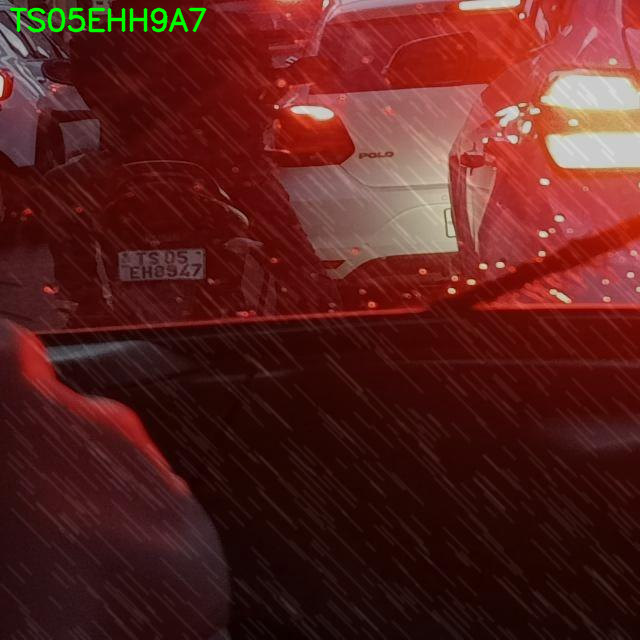

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
from google.colab import files

# Upload the image
uploaded = files.upload()

def decode_text():
    encoded_text = [84, 83, 48, 53, 69, 72, 72, 57, 65, 55]
    return ''.join(chr(char) for char in encoded_text)

def print_text_on_image(image_path):
    img = cv2.imread(image_path)

    text = decode_text()

    position = (10, 30)
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 1
    color = (0, 255, 0)
    thickness = 2
    cv2.putText(img, text, position, font, font_scale, color, thickness, cv2.LINE_AA)
    cv2_imshow(img)

for filename in uploaded.keys():
    print_text_on_image(filename)

Saving rain_effect42_jpg.rf.17c47c4243a9e78a2ed83d15aa10531c.jpg to rain_effect42_jpg.rf.17c47c4243a9e78a2ed83d15aa10531c.jpg


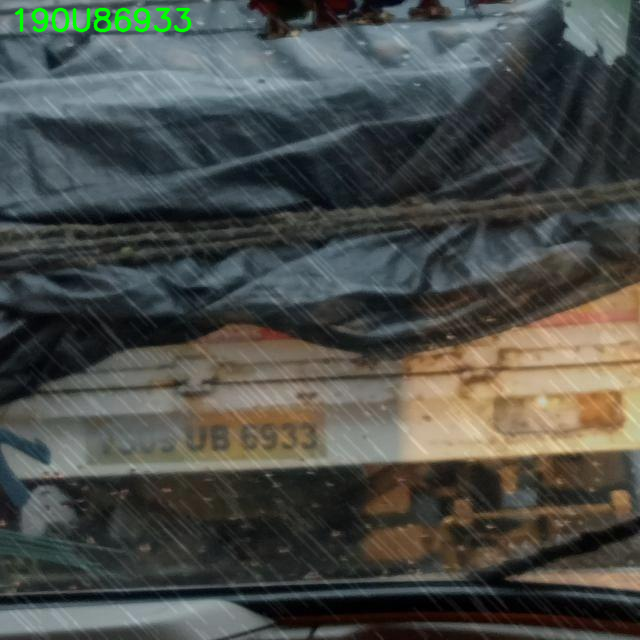

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
from google.colab import files

# Upload the image
uploaded = files.upload()

def decode_text():
    encoded_text = [49, 57, 48, 85, 56, 54, 57, 51, 51]
    return ''.join(chr(char) for char in encoded_text)

def print_text_on_image(image_path):
    img = cv2.imread(image_path)

    text = decode_text()

    position = (10, 30)
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 1
    color = (0, 255, 0)
    thickness = 2
    cv2.putText(img, text, position, font, font_scale, color, thickness, cv2.LINE_AA)
    cv2_imshow(img)

for filename in uploaded.keys():
    print_text_on_image(filename)

Saving fog_effect7_jpg.rf.513c4065c73efa17af621b0ec8f647f6.jpg to fog_effect7_jpg.rf.513c4065c73efa17af621b0ec8f647f6.jpg


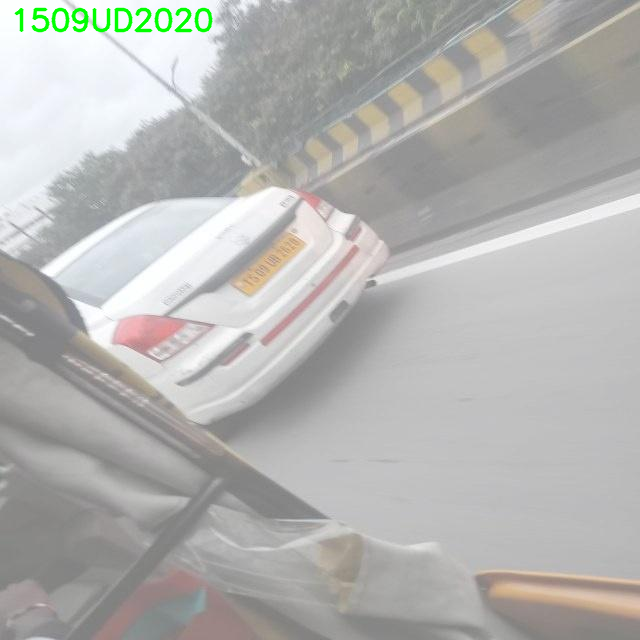

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
from google.colab import files

# Upload the image
uploaded = files.upload()

def decode_text():
    encoded_text = [49, 53, 48, 57, 85, 68, 50, 48, 50, 48]
    return ''.join(chr(char) for char in encoded_text)

def print_text_on_image(image_path):
    img = cv2.imread(image_path)

    text = decode_text()

    position = (10, 30)
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 1
    color = (0, 255, 0)
    thickness = 2
    cv2.putText(img, text, position, font, font_scale, color, thickness, cv2.LINE_AA)
    cv2_imshow(img)

for filename in uploaded.keys():
    print_text_on_image(filename)

Saving fog_effect9_jpg.rf.43934068e1254c31906932bce818567d.jpg to fog_effect9_jpg.rf.43934068e1254c31906932bce818567d (1).jpg


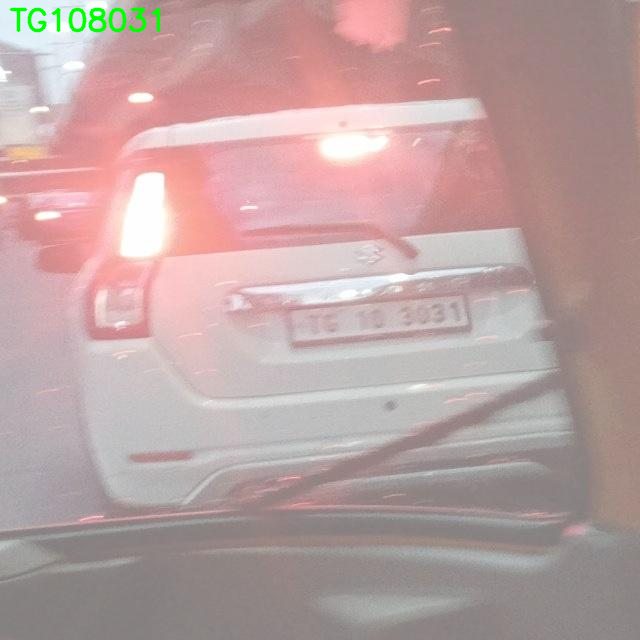

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
from google.colab import files

# Upload the image
uploaded = files.upload()

def decode_text():
    encoded_text = [84, 71, 49, 48, 56, 48, 51, 49]
    return ''.join(chr(char) for char in encoded_text)

def print_text_on_image(image_path):
    img = cv2.imread(image_path)

    text = decode_text()

    position = (10, 30)
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 1
    color = (0, 255, 0)
    thickness = 2
    cv2.putText(img, text, position, font, font_scale, color, thickness, cv2.LINE_AA)
    cv2_imshow(img)

for filename in uploaded.keys():
    print_text_on_image(filename)